In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import joblib
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

In [32]:
df = pd.read_csv('c:/Users/nishant/jobthon/datasets/ohe_fold.csv')
df_test = pd.read_csv('c:/Users/nishant/jobthon/datasets/test_ohe.csv')

In [4]:
df

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Premium,Response,sum_low_up_reco,mean_low_up,city_region,...,x6_21,x6_22,x6_3,x6_4,x6_5,x6_6,x6_7,x6_8,x6_9,kfold
0,37577,34,278,42,30,2,0,22644.0,36.0,4937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,35600,22,2827,41,41,4,0,8818.0,41.0,3745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,48997,34,1923,64,64,8,0,13504.0,64.0,4898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,45355,0,232,51,51,5,1,10992.0,51.0,1254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,9330,0,2890,75,75,9,0,21302.0,75.0,1349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,6090,31,3123,48,48,5,1,11544.0,48.0,4390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50878,19290,0,1371,22,22,1,1,6804.0,22.0,1114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50879,43030,33,208,55,20,0,0,28203.0,37.5,4710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50880,30900,7,395,47,47,5,0,10912.0,47.0,686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


## Data Cleaning

In [6]:
df.shape

(50882, 14)

In [5]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [7]:
df['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [8]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [36]:
type(df['Holding_Policy_Duration'][0])

str

In [17]:
df.loc[df['Holding_Policy_Duration'].isnull()==True ,'Holding_Policy_Type'].value_counts()

Series([], Name: Holding_Policy_Type, dtype: int64)

Holding Policy Type , Holding Policy Duration and Health Indicator have many NULL values<br>
1. Missing value can be converted to a category named as 'unknown' in Holding Policy Type and Health Indicator
2. Missing Values can be converted to 0 in Holding Policy Duration .

In [24]:
df['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [29]:
df_test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [33]:
df.loc[df['Holding_Policy_Type'].isnull()==True,'Holding_Policy_Type'] = 'unknown'

In [43]:
type(df['Holding_Policy_Type'][0])

float

In [35]:
df.loc[df['Holding_Policy_Type'].isnull()==True,'Holding_Policy_Type'] = 'unknown'

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,unknown,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,unknown,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [37]:
for col in df.columns:
    print(df[col].value_counts())

2049     1
46396    1
42302    1
44351    1
21856    1
        ..
31386    1
29339    1
19100    1
17053    1
2047     1
Name: ID, Length: 50882, dtype: int64
C1     8973
C2     7747
C3     4889
C4     3671
C9     2185
C6     1950
C7     1910
C8     1806
C10    1611
C5     1364
C15    1186
C17    1159
C11    1147
C16    1135
C13    1005
C20     926
C19     899
C12     868
C18     797
C14     746
C21     679
C23     587
C24     553
C22     516
C26     499
C29     387
C25     366
C27     295
C33     286
C28     285
C32     160
C34     130
C30      58
C35      56
C36      36
C31      15
Name: City_Code, dtype: int64
1       96
5       75
2       73
6       73
4       73
        ..
5859     1
5412     1
5380     1
5795     1
5638     1
Name: Region_Code, Length: 5316, dtype: int64
Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64
Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64
75    2982
23    1671
24    1652
25    1644
22    1563
26    1

In [44]:
cat_col = ['Holding_Policy_Type','Accomodation_Type']
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[cat_col].astype(str))

OneHotEncoder(handle_unknown='ignore')

In [50]:
enc.transform(df[cat_col]).toarray().shape

(50882, 7)

In [46]:
df['Holding_Policy_Type'].value_counts()

unknown    20251
3.0        13279
1.0         8173
2.0         5005
4.0         4174
Name: Holding_Policy_Type, dtype: int64

In [47]:
df['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [73]:
df

,ID,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Premium,Response,x0_C1,x0_C10,x0_C11,x0_C12,...,x7_21,x7_22,x7_3,x7_4,x7_5,x7_6,x7_7,x7_8,x7_9,kfold
0,21723,2977,65,65,15512.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,34798,1,67,67,15456.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,42727,337,24,24,6180.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,44938,3657,39,39,8946.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,19029,729,75,75,23494.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,39452,883,51,47,16184.0,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50878,858,6105,54,54,14712.0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50879,5966,1821,32,32,12760.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50880,49739,354,41,18,27993.6,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [77]:
df[df['kfold']==0]['Response'].value_counts()


0    7735
1    2442
Name: Response, dtype: int64

In [78]:
df[df['kfold']==1]['Response'].value_counts()


0    7735
1    2442
Name: Response, dtype: int64

In [79]:
df[df['kfold']==2]['Response'].value_counts()


0    7735
1    2441
Name: Response, dtype: int64

In [80]:
df[df['kfold']==3]['Response'].value_counts()


0    7734
1    2442
Name: Response, dtype: int64

<AxesSubplot:>

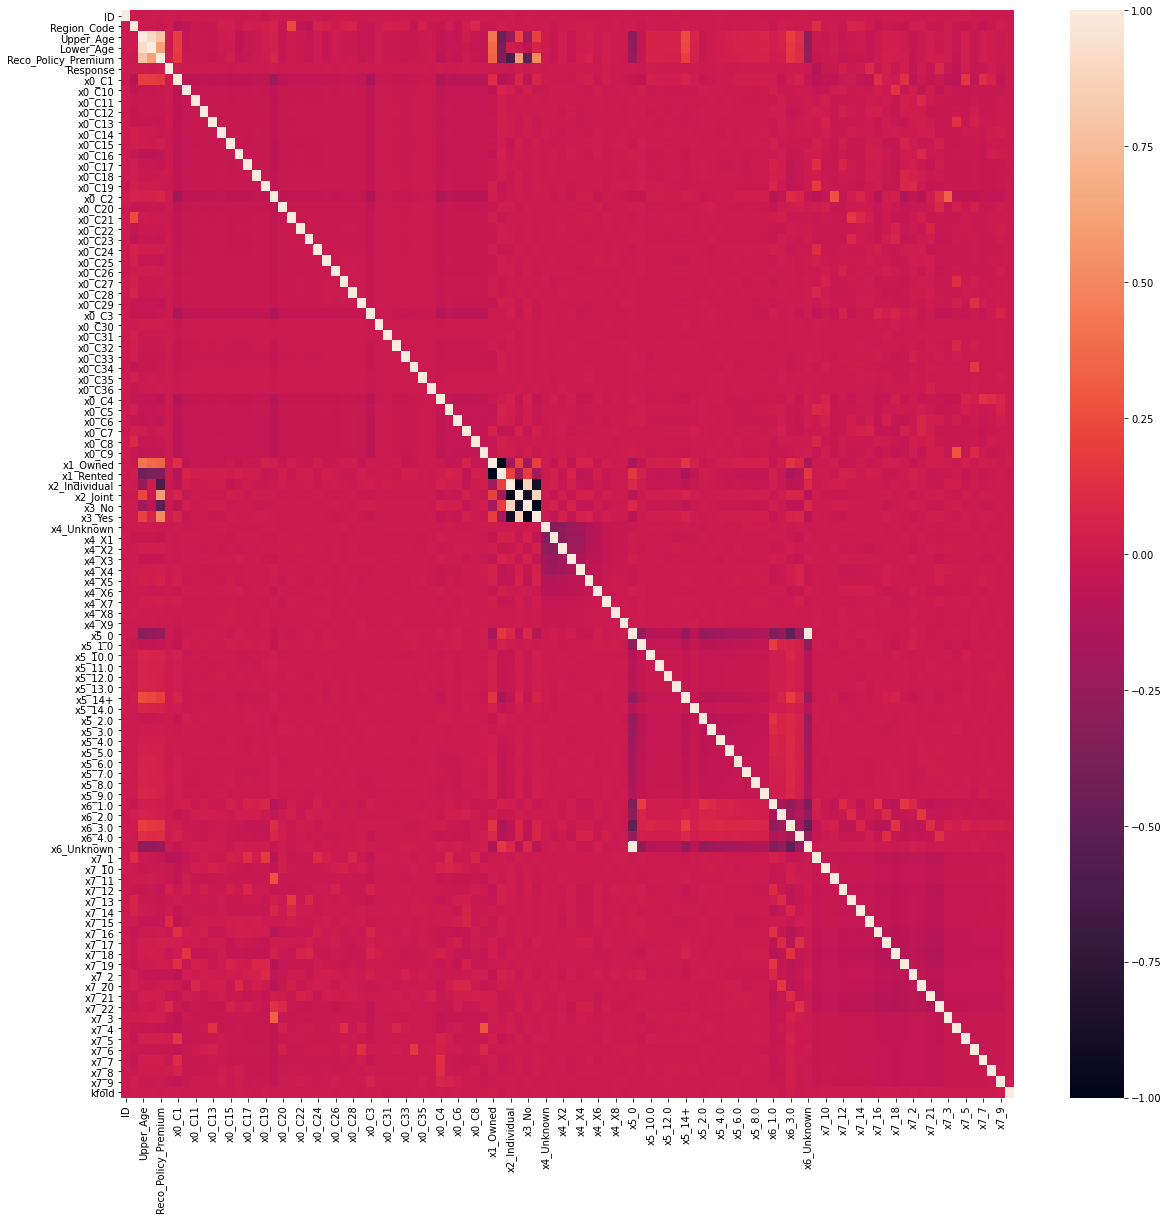

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [23]:
features_to_remove = ['ID','Response','kfold']
    
df = df.drop(columns=features_to_remove,axis=1)

In [180]:
clf = joblib.load('c:/Users/nishant/jobthon/models/xgb_3.bin')

In [181]:
imp =pd.Series(clf.feature_importances_,index=df.columns)

<AxesSubplot:>

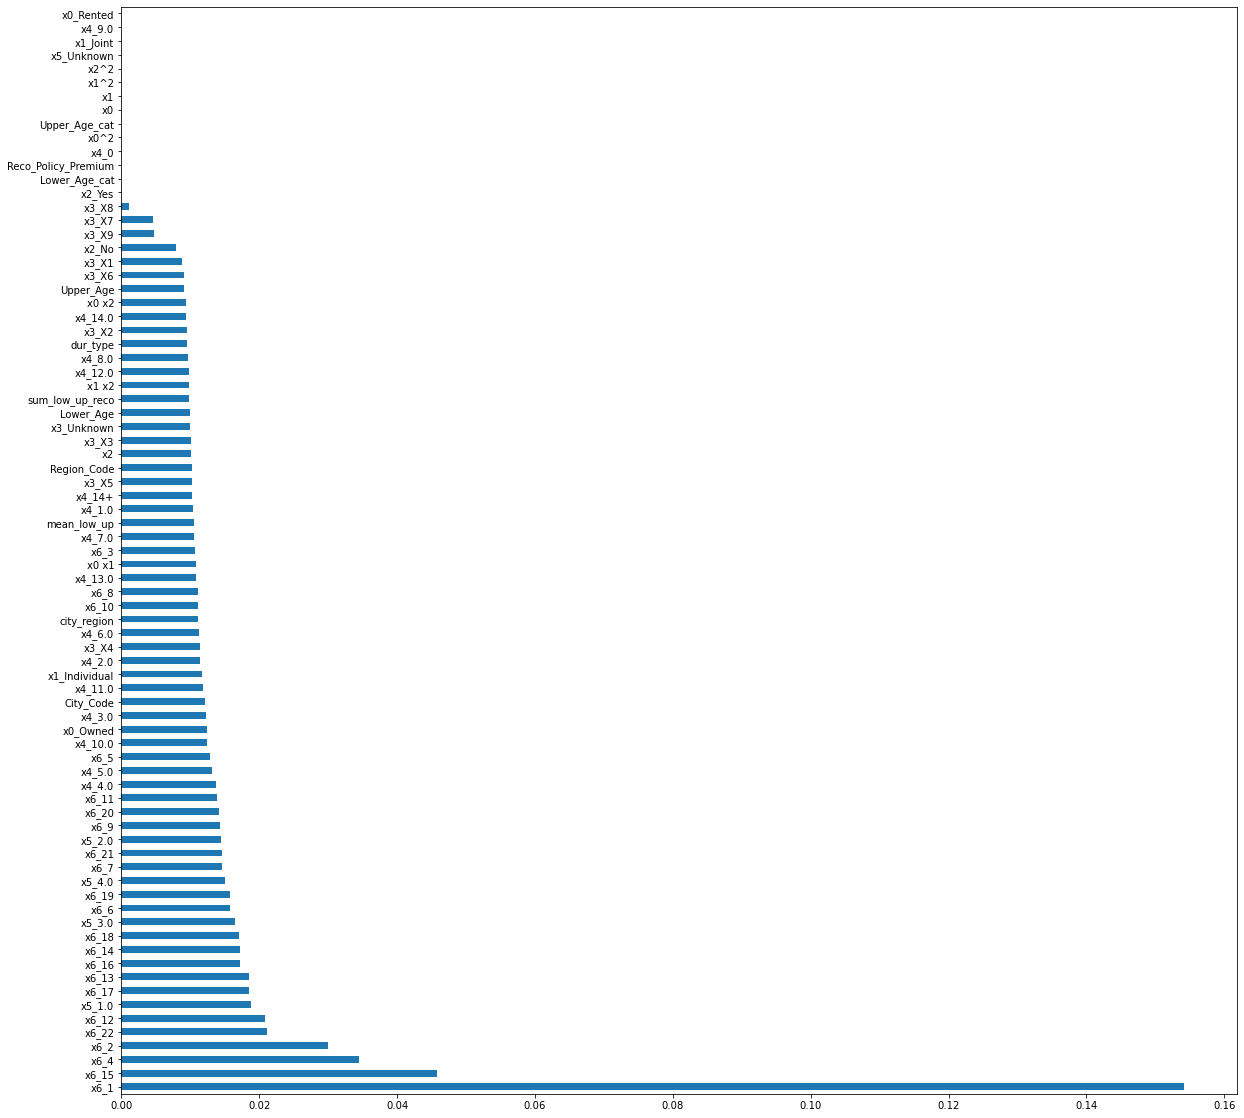

In [182]:
imp = imp.sort_values(ascending=False) 
imp.plot(kind='barh',figsize=(20,20))

In [43]:
df.loc[:,['Upper_Age','Lower_Age','Reco_Policy_Premium','Response']].corr()

,Upper_Age,Lower_Age,Reco_Policy_Premium,Response
Upper_Age,1.000000,0.921392,0.792689,0.002772
Lower_Age,0.921392,1.000000,0.615739,-0.002099
Reco_Policy_Premium,0.792689,0.615739,1.000000,0.007943
Response,0.002772,-0.002099,0.007943,1.000000


In [183]:
clf_2 = joblib.load('c:/Users/nishant/jobthon/models/random_forest_gini_3.bin')

<AxesSubplot:>

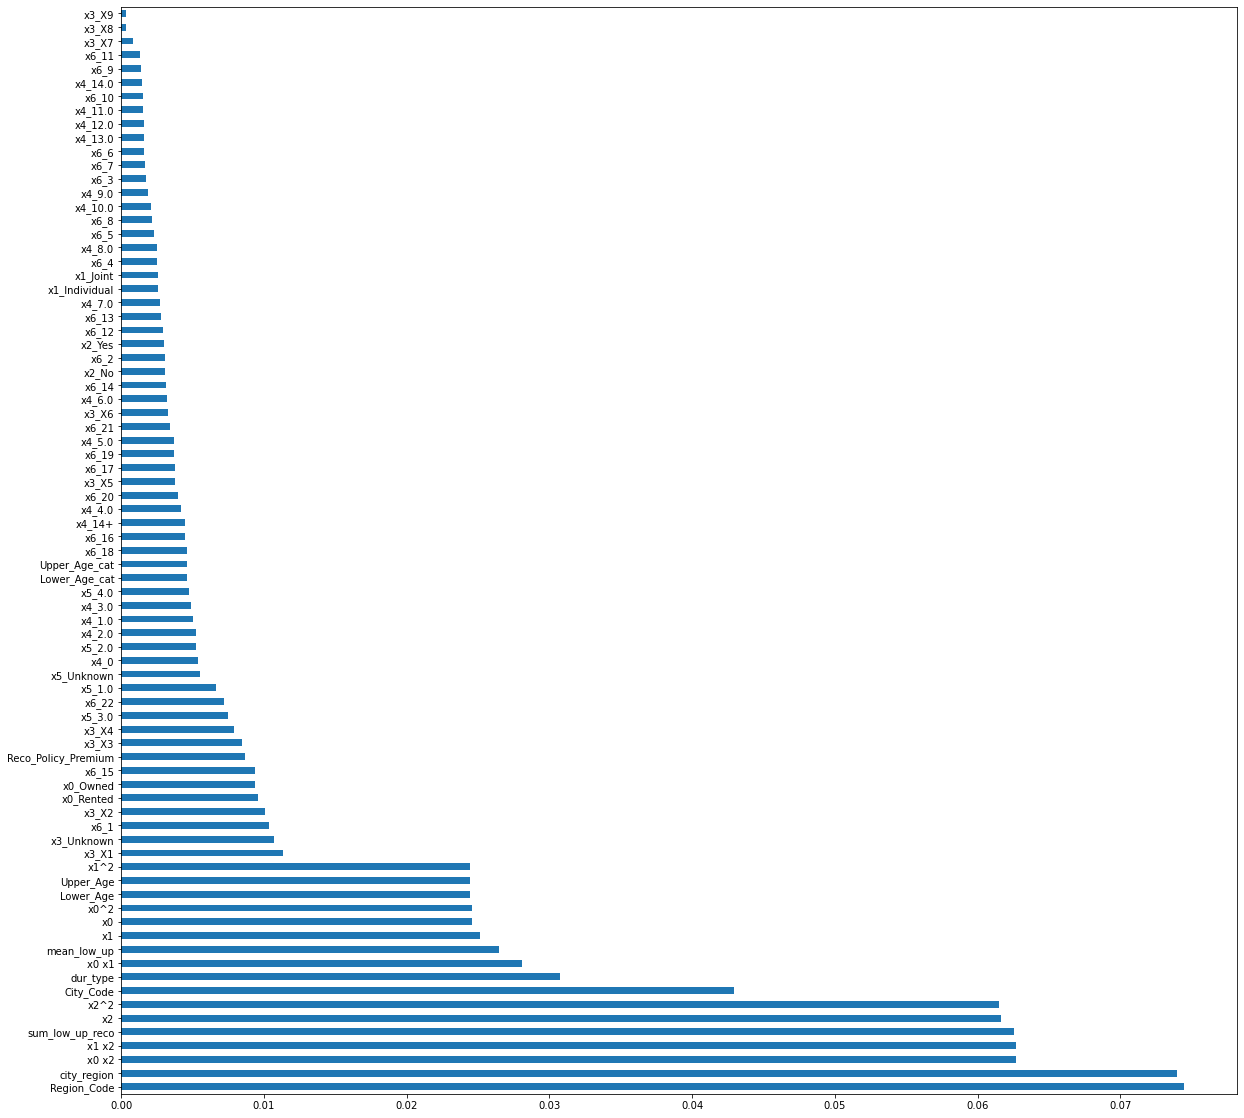

In [184]:
imp2 = pd.Series(clf_2.feature_importances_,index=df.columns)
imp2 = imp2.sort_values(ascending=False) 
imp2.plot(kind='barh',figsize=(20,20))

In [47]:
df['sum_low_up_reco'] = df['Upper_Age'] + df['Lower_Age'] + df['Reco_Policy_Premium']

In [48]:
df['sum_low_up_reco']

0        15642.0
1        15590.0
2         6228.0
3         9024.0
4        23644.0
          ...   
50877    16282.0
50878    14820.0
50879    12824.0
50880    28052.6
50881     7372.0
Name: sum_low_up_reco, Length: 50882, dtype: float64

In [51]:
df['mean_low_up']  = (df['Upper_Age'] + df['Lower_Age'])/2.0

In [52]:
df['mean_low_up']  

0        65.0
1        67.0
2        24.0
3        39.0
4        75.0
         ... 
50877    49.0
50878    54.0
50879    32.0
50880    29.5
50881    21.0
Name: mean_low_up, Length: 50882, dtype: float64

In [65]:
df['Lower_Age_cat'] = pd.cut(df['Lower_Age'],bins=10,labels=False)

In [66]:
df.loc[:,'Lower_Age_cat'] 

0        3
1        1
2        2
3        5
4        4
        ..
50877    1
50878    1
50879    7
50880    5
50881    1
Name: Lower_Age_cat, Length: 50882, dtype: int64

In [120]:
imp_feat = imp.index

In [123]:
imp2_feat = imp2.index

In [124]:

features = imp_feat.intersection(imp2_feat)

In [127]:
len(features)

34

In [142]:
features_to_remove = [x for x in df.columns if x not in imp_feat]

In [143]:
features_to_remove

['ID',
 'Reco_Policy_Premium',
 'Response',
 'Lower_Age_cat',
 'Upper_Age_cat',
 'x0_Rented',
 'x1_Individual',
 'x1_Joint',
 'x2_Yes',
 'x3_Unknown',
 'x3_X1',
 'x3_X2',
 'x3_X6',
 'x3_X8',
 'x3_X9',
 'x4_0',
 'x4_1.0',
 'x4_14+',
 'x4_5.0',
 'x4_8.0',
 'x4_9.0',
 'x5_Unknown',
 'kfold']

In [144]:
print(len(features))
print(len(features_to_remove))

34
23


In [139]:
len(df.columns)

73

In [159]:
df['Reco_Policy_Cat']

0        22
1        22
2        19
3        19
4        16
         ..
50877    18
50878     4
50879    12
50880    16
50881    18
Name: Reco_Policy_Cat, Length: 50882, dtype: int64

In [163]:
pf = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)

In [170]:
pf.fit(df.loc[:,['Reco_Policy_Premium']])

PolynomialFeatures(include_bias=False)

In [171]:
poly_feat = pf.transform(df.loc[:,['Reco_Policy_Premium']])

In [174]:
poly_feat.get_feature_names

AttributeError: 'numpy.ndarray' object has no attribute 'get_feature_names'

In [168]:
df.loc[:,['Upper_Age','Lower_Age']]

,Upper_Age,Lower_Age
0,36,36
1,75,22
2,32,32
3,52,48
4,44,44
...,...,...
50877,22,22
50878,27,27
50879,63,63
50880,71,49


In [175]:
pf = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)
pf.fit(df.loc[:,['Upper_Age','Lower_Age','Reco_Policy_Premium']])
poly_feat = pf.transform(df.loc[:,['Upper_Age','Lower_Age','Reco_Policy_Premium']])
    

In [27]:
var_thresh  = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(df)

In [28]:
var_thresh.get_support([df.columns])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 36, 52, 54,
       56, 71], dtype=int64)

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Premium,Response,sum_low_up_reco,mean_low_up,city_region,...,x6_21,x6_22,x6_3,x6_4,x6_5,x6_6,x6_7,x6_8,x6_9,kfold
0,37577,34,278,42,30,2,0,22644.0,36.0,4937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,35600,22,2827,41,41,4,0,8818.0,41.0,3745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,48997,34,1923,64,64,8,0,13504.0,64.0,4898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,45355,0,232,51,51,5,1,10992.0,51.0,1254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,9330,0,2890,75,75,9,0,21302.0,75.0,1349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,6090,31,3123,48,48,5,1,11544.0,48.0,4390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50878,19290,0,1371,22,22,1,1,6804.0,22.0,1114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50879,43030,33,208,55,20,0,0,28203.0,37.5,4710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50880,30900,7,395,47,47,5,0,10912.0,47.0,686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [37]:
xgb=XGBClassifier(n_estimators = 1000,max_depth = 5 ,use_label_encoder=False)

In [ ]:
for i in range(5):
    x_train = df_train.drop(columns=features_to_remove,axis=1)
    y_train = df_train.Response.values
    